In [1]:
import os
import re
import ROOT
import uproot
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.24/09


In [2]:
ofname = os.path.expandvars("$HOME/Software/WCSimFQTuningTools/Angular/old_tools/angular.root")
fname  = os.path.expandvars("$HOME/Software/WCSimFQTuningTools/Angular/angular.root")

of = uproot.open(ofname)
f  = uproot.open(fname)

In [3]:
ofname_fits = os.path.expandvars("$HOME/Software/WCSimFQTuningTools/Angular/old_tools/angResp_geoName.root")
of_fits = ROOT.TFile(ofname_fits)
otf1 = of_fits.Get("angResp")


fname_fits = os.path.expandvars("$HOME/Software/WCSimFQTuningTools/Angular/fitted_angular.root")
f_fits = ROOT.TFile(fname_fits)
tf1 = f_fits.Get("angResp")

In [4]:
ridx = 0
oh, obins         = of["angRespAll_50"]     .to_numpy()
h, rbins, etabins = f["AngularResponse_all"].to_numpy()
h = h[ridx]

In [5]:
# npolys = 2

# xmin, xmax = 0., 1.
# polydeg  = 5

# etas = (etabins[1:] + etabins[:-1])/2.
# pars = np.polyfit(etas, h, polydeg)
# # check ch2?     
# tf1 = ROOT.TF1("angResp", f"pol{polydeg}", xmin, xmax)
# tf1.SetParameters(*np.flip(pars))

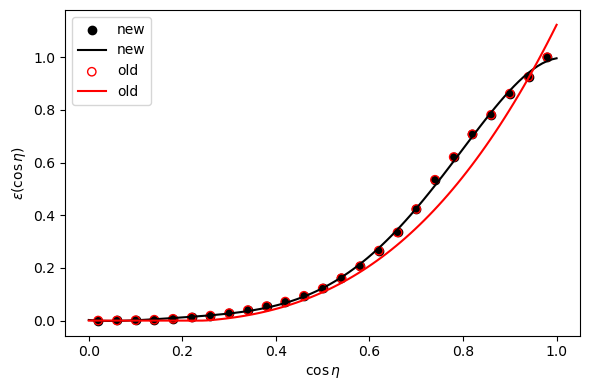

In [6]:
plt.figure(figsize=[6, 4])

# new
x = (etabins[1:] + etabins[:-1])/2.
plt.scatter(x, h, color="k", label="new")

x = np.linspace(0., 0.9999, 100)
fitted = [tf1.Eval(eta) for eta in x]
plt.plot(x, fitted, color="k", label="new")

# old
x = (obins[1:] + obins[:-1])/2.
plt.scatter(x, oh, color="none", edgecolor="red", label="old")

x = np.linspace(0, 1, 100)
fitted = [otf1.Eval(eta) for eta in x]
plt.plot(x, fitted, color="red", label="old")

plt.xlabel(r"$\cos \eta$")
plt.ylabel(r"$\epsilon(\cos \eta)$")
plt.legend()
plt.tight_layout()